In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from mpl_toolkits.mplot3d import Axes3D

tf.random.set_seed(777)

print(tf.__version__)
print(np.__version__)

2.3.0
1.18.5


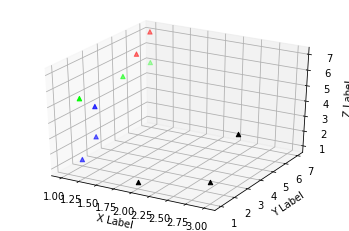

In [4]:
#x1, x2, x3로 y_data를 3개의 클래스로 구분
#파랑-2, 초록-1, 빨강-0

x_train = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]

y_train = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]


x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]
x3 = [x[2] for x in x_train]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x1, x2, x3, c = y_train, marker = '^')

ax.scatter(x_test[0][0], x_test[0][1], x_test[0][2], c = "black", marker = '^')
ax.scatter(x_test[1][0], x_test[1][1], x_test[1][2], c = "black", marker = '^')
ax.scatter(x_test[2][0], x_test[2][1], x_test[2][2], c = "black", marker = '^')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [5]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

W = tf.Variable(tf.random.normal((3, 3)))
b = tf.Variable(tf.random.normal((3,)))

In [13]:
def softmax_fn(features):
    hypo = tf.nn.softmax(tf.matmul(features, W) + b)
    return hypo

def loss_fn(hypo, features, labels):
    cost = tf.reduce_mean(-tf.reduce_sum(labels * tf.math.log(hypo), axis = 1))
    return cost

In [16]:
is_decay = True
#최초 learning_rate
starter_learning_rate = 0.1

#decay_step : 1000번 마다 learning_rate update
#decay_rate : 기존 learning_rate에 곱해서 update 
if(is_decay):
    learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate = starter_learning_rate,
                                                                  decay_steps = 1000,
                                                                  decay_rate = 0.96,
                                                                  staircase = True)
    optimizer = tf.keras.optimizers.SGD(learning_rate)
else:
    optimizer = tf.keras.optimizers.SGD(learning_rate = starter_learing_rate)

def grad(hypo, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(softmax_fn(features), features, labels)
    return tape.gradient(loss_value, [W, b])

In [9]:
#정확도 측정 함수
def accuracy_fn(hypo, labels):
    prediction = tf.argmax(hypo, 1)
    is_correct = tf.equal(prediction, tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
    return accuracy

In [17]:
#학습

EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels in iter(dataset):
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        grads = grad(softmax_fn(features), features, labels)
        optimizer.apply_gradients(grads_and_vars = zip(grads, [W, b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(softmax_fn(features),features,labels)))

x_test = tf.cast(x_test, tf.float32)
y_test = tf.cast(y_test, tf.float32)
test_acc = accuracy_fn(softmax_fn(x_test), y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 7.8510
Iter: 100, Loss: 0.6915
Iter: 200, Loss: 0.5892
Iter: 300, Loss: 0.5326
Iter: 400, Loss: 0.4927
Iter: 500, Loss: 0.4615
Iter: 600, Loss: 0.4358
Iter: 700, Loss: 0.4139
Iter: 800, Loss: 0.3951
Iter: 900, Loss: 0.3785
Iter: 1000, Loss: 0.3638
Testset Accuracy: 1.0000
